## Helium Pectra Calibration of double monochrometer Ramnor 

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy import stats

read data collected tron NI labview

In [2]:
df = pd.read_csv('Helium 3.txt',header = None,delimiter='\t')

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,88971,0.115846,0.117186,0.115176,0.115846,0.115511,0.115176,0.114841,0.115846,0.114841,0.115511
1,88972,0.113835,0.115511,0.114841,0.116516,0.116181,0.112495,0.115176,0.117521,0.114841,0.111825
2,88973,0.114841,0.115176,0.116516,0.114506,0.114841,0.112830,0.116516,0.114506,0.115511,0.114506
3,88974,0.116181,0.117521,0.109144,0.115846,0.115176,0.113165,0.113500,0.113500,0.115511,0.116851
4,88975,0.114171,0.115511,0.115511,0.115846,0.115846,0.115511,0.115846,0.114171,0.110820,0.116181
...,...,...,...,...,...,...,...,...,...,...,...
10026,98997,0.114506,0.115846,0.115176,0.116851,0.116516,0.114506,0.116181,0.115176,0.115846,0.115846
10027,98998,0.115511,0.117186,0.116181,0.111490,0.115176,0.115176,0.116181,0.116181,0.113835,0.112160
10028,98999,0.113835,0.110485,0.114841,0.115511,0.114506,0.112160,0.114506,0.115176,0.114506,0.116516
10029,99000,0.114171,0.112830,0.114506,0.114841,0.115176,0.115176,0.106128,0.116516,0.114506,0.118191


In [4]:
# relabel data columns
for i in range(0,12):
    if i == 0:
        df.rename(columns = {i:'Wavenumber'}, inplace = True)
    else:
        df.rename(columns = {i:'Sample'+str(i)}, inplace = True)

In [5]:
df

,Wavenumber,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
0,88971,0.115846,0.117186,0.115176,0.115846,0.115511,0.115176,0.114841,0.115846,0.114841,0.115511
1,88972,0.113835,0.115511,0.114841,0.116516,0.116181,0.112495,0.115176,0.117521,0.114841,0.111825
2,88973,0.114841,0.115176,0.116516,0.114506,0.114841,0.112830,0.116516,0.114506,0.115511,0.114506
3,88974,0.116181,0.117521,0.109144,0.115846,0.115176,0.113165,0.113500,0.113500,0.115511,0.116851
4,88975,0.114171,0.115511,0.115511,0.115846,0.115846,0.115511,0.115846,0.114171,0.110820,0.116181
...,...,...,...,...,...,...,...,...,...,...,...
10026,98997,0.114506,0.115846,0.115176,0.116851,0.116516,0.114506,0.116181,0.115176,0.115846,0.115846
10027,98998,0.115511,0.117186,0.116181,0.111490,0.115176,0.115176,0.116181,0.116181,0.113835,0.112160
10028,98999,0.113835,0.110485,0.114841,0.115511,0.114506,0.112160,0.114506,0.115176,0.114506,0.116516
10029,99000,0.114171,0.112830,0.114506,0.114841,0.115176,0.115176,0.106128,0.116516,0.114506,0.118191


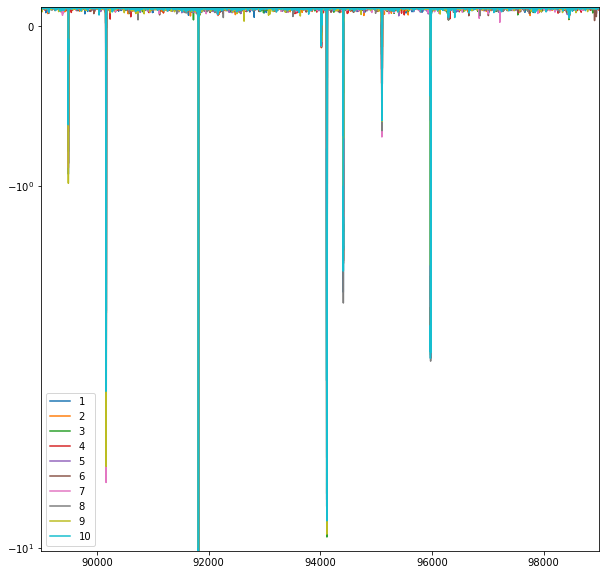

In [6]:
# plot wavenumber by voltage
plt.figure(figsize=(10,10))
for j in range(1,11):
    y = "Sample"+str(j)
    plt.plot(df.Wavenumber,df[y],label=j)
    plt.ylim(df.Sample1.min(),df.Sample1.max()) # largest magnitude, lowest magnitude
plt.yscale("symlog")
plt.xlim(89000,99000)
plt.legend()

In [7]:
df.Sample1.min(),df.Sample1.max()

(-10.208469000000001, 0.118861)

In [8]:
# get wavenumber for spesific voltage
def get_wn(dataframe, val):
    array = dataframe.query(f'Sample1 == {val}')
    return array

In [9]:
# getting the largest magnitude value wavenumber
lm_val= df.Sample1.min()
get_wn(df, lm_val)

,Wavenumber,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
2838,91809,-10.208469,-6.558176,-10.208469,-6.083824,-10.208469,-9.970000,-10.208469,-8.472248,-10.208469,-10.208469
2839,91810,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.045284
2840,91811,-10.208469,-10.208469,-10.208469,-9.125481,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469
2842,91813,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469
2843,91814,-10.208469,-8.854770,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469
2844,91815,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469
2845,91816,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469
2846,91817,-10.208469,-10.208469,-6.867305,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469
2847,91818,-10.208469,-10.208469,-10.208469,-10.208469,-10.208469,-7.896246,-10.208469,-5.374173,-10.208469,-4.950456


In [10]:
# getting the smallest magnitude value wavenumber
sm_val= df.Sample1.max()
get_wn(df, sm_val)

,Wavenumber,Sample1,Sample2,Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10
1622,90593,0.118861,0.111825,0.115846,0.103112,0.115176,0.111825,0.108809,0.115846,0.113835,0.109814
8030,97001,0.118861,0.116516,0.116181,0.112830,0.116181,0.115846,0.115846,0.115846,0.115846,0.115176
8652,97623,0.118861,0.114506,0.117856,0.112160,0.115511,0.116516,0.115176,0.117521,0.116181,0.112830


In [11]:
find_peaks(df.Sample1)[0]

array([    3,     5,     7, ..., 10018, 10023, 10027])

In [12]:
x = -(df.Sample1-df.Sample1.mean())

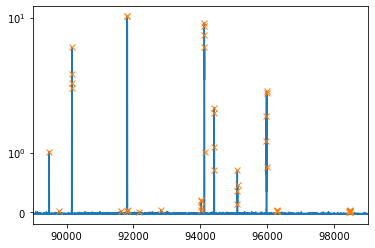

In [13]:
peaks, f = find_peaks(x, height=0.01)
plt.plot(df.Wavenumber, x)
plt.plot(peaks+df.Wavenumber.min(), x[peaks], "x")
plt.plot(np.zeros_like(x), "--", color="gray")
plt.yscale('symlog')
plt.xlim(89000,99000)
# plt.ylim(0.01,.5)
plt.show()

In [14]:
peak_data= {}
a = []
l = []
for p in peaks:
    if x[p] >df.Sample1.mean():
        a.append(p+df.Wavenumber.min())
        l.append(x[p])
peak_data['Wavenumber'] = a
peak_data['Voltage'] = l
df2 = pd.DataFrame(peak_data)

In [15]:
df2

,Wavenumber,Voltage
0,89483,1.014096
1,90156,2.223668
2,90158,2.480830
3,90160,5.303380
4,90162,2.969467
5,91810,10.299416
6,91815,10.299416
7,94013,0.092149
8,94016,0.191923
9,94020,0.204700


In [16]:
he = pd.read_csv('clean_helium_data - Sheet1.csv')
he.head()

,Wavenumber,Intensity
0,41921.69028,7
1,39821.59924,9
2,36721.63896,1
3,36585.81202,12
4,36182.06817,2


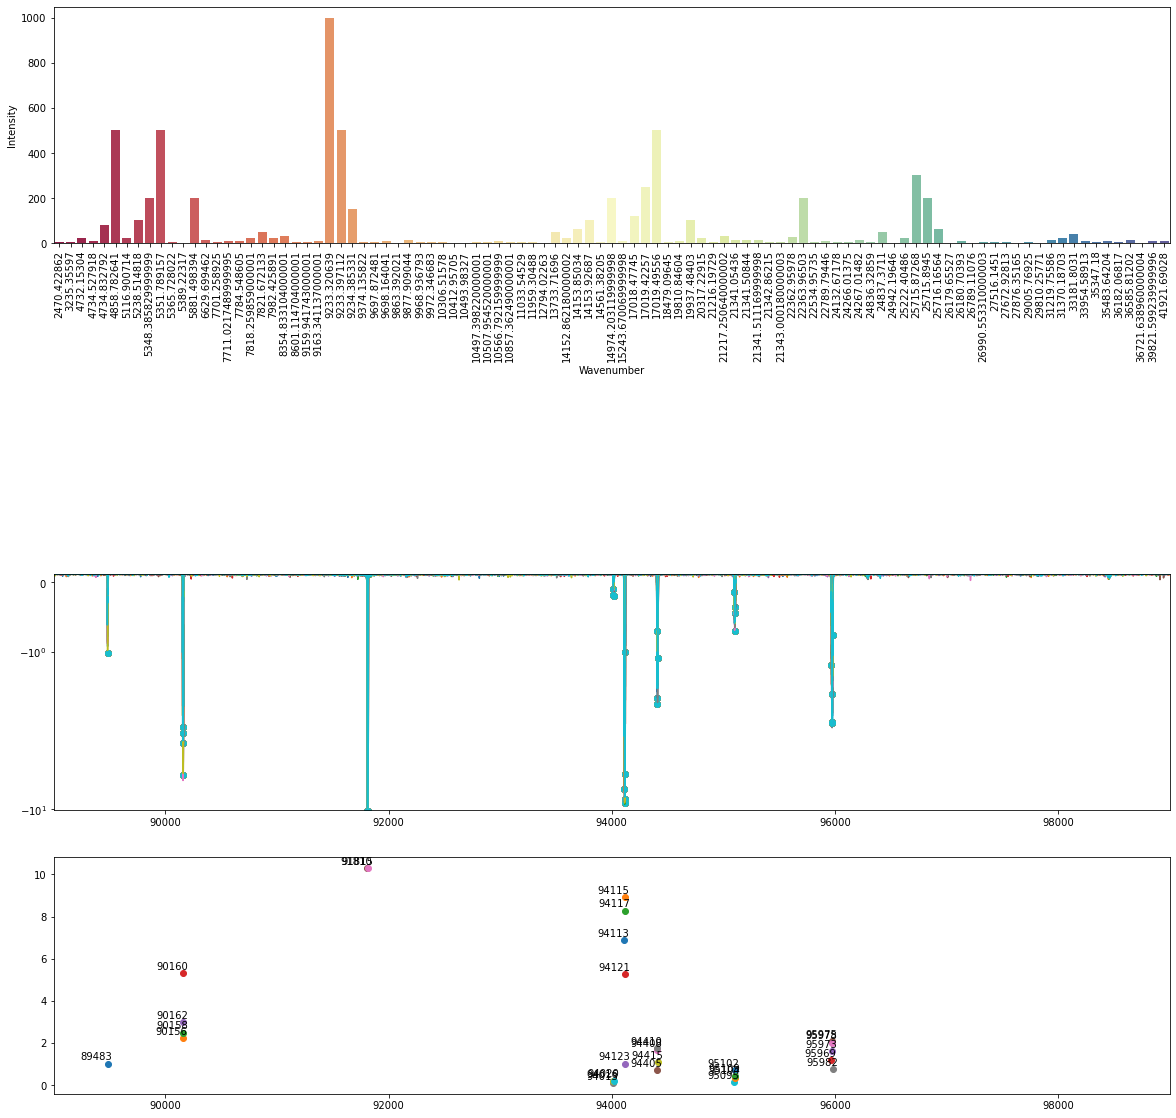

In [17]:
# plot wavenumber by voltage
plt.figure(figsize=(20,20))

plt.subplot(4, 1, 1)
# sns.barplot(x='Wavenumber',y='Intensity', data=he)
barplot = sns.barplot(x='Wavenumber'
                      ,y='Intensity'
                      ,data=he
                      ,ci=None
                      ,palette = 'Spectral'
                      )
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=90, fontsize=10)
barplot.figure


plt.subplot(4, 1, 2)
plt.plot(0, 0)
plt.axis('off')

plt.subplot(4, 1, 3)
for j in range(1,11):
    y = "Sample"+str(j)
    plt.plot(df.Wavenumber,df[y],label=j)
    plt.scatter(df2.Wavenumber, -df2.Voltage)

    plt.ylim(df.Sample1.min(),df.Sample1.max()) # largest magnitude, lowest magnitude
    
plt.yscale("symlog")
plt.xlim(89000,99000)

plt.subplot(4, 1, 4)
# plt.scatter(df2.Wavenumber, df2.Voltage)

for i, label in enumerate(df2.Wavenumber): #get (0, label)
    x = df2.Wavenumber[i] #2 dim
    y = df2.Voltage[i]
    plt.scatter(x, y)
            #
    plt.annotate(label,
            xy=(x, y), #show point 
            xytext=(5, 2), #show annotate
            textcoords='offset points',
            ha='right',
            va='bottom')

plt.xlim(89000,99000)
plt.show()

In [18]:
measured = [89483, 90160, 91810, 94115, 94410,95102,95975]
physical = [4858.782641, 5351.789157,9233.320638, 17019.08556, 19937.4803 ,22363.96503, 95714.87268 ]

In [25]:
# m, b, r_value, p_value, std_err = stats.linregress(measured, physical)
# m, b, r_value, p_value, std_err

From here we guess as to the actual 

In [47]:
guess = pd.read_csv('guess3.txt', delimiter='\t')
guess.head()

,wavenumber,actual
0,89483,14153.92687
1,90159,14974.20312
2,91813,17019.49556
3,94115,19937.48403
4,95102,22363.96503


In [48]:
m, b, r_value, p_value, std_err = stats.linregress(guess.wavenumber, guess.actual)
m, b, r_value, p_value, std_err

(1.6353428580094487,
 -132690.6247653976,
 0.9775527977063101,
 0.0007501600229711494,
 0.17623158768901476)

In [49]:
def make_into_measured_wn(wn, m, b):
    return (wn-b)/m

(89000.0, 99000.0)

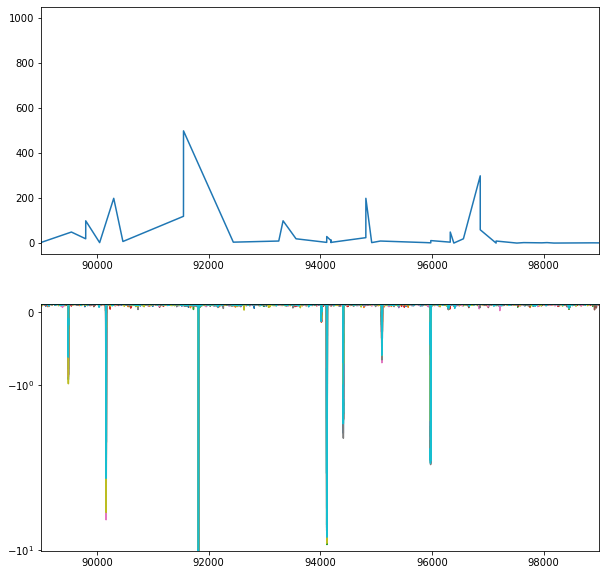

In [50]:
# plot wavenumber by voltage
plt.figure(figsize=(10,10))
plt.subplot(2, 1, 1)
plt.plot(make_into_measured_wn(he.Wavenumber,m,b), he.Intensity)
plt.xlim(89000,99000)
plt.subplot(2, 1, 2)
for j in range(1,11):
    y = "Sample"+str(j)
    plt.plot(df.Wavenumber,df[y],label=j)
    plt.ylim(df.Sample1.min(),df.Sample1.max()) # largest magnitude, lowest magnitude
plt.yscale("symlog")
plt.xlim(89000,99000)

(24000.0, 420000.0)

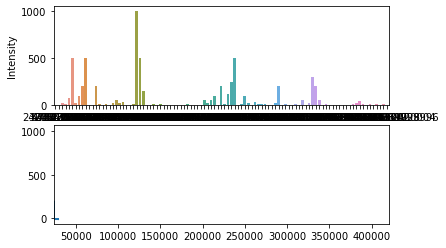

In [55]:
plt.plot(he.Wavenumber,he.Intensity)
plt.plot(df.Wavenumber*m +b, -df.Sample1*100)